<a href="https://colab.research.google.com/github/ypahaly/Linear-Model-Predictive-Control/blob/experiments/neutralization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

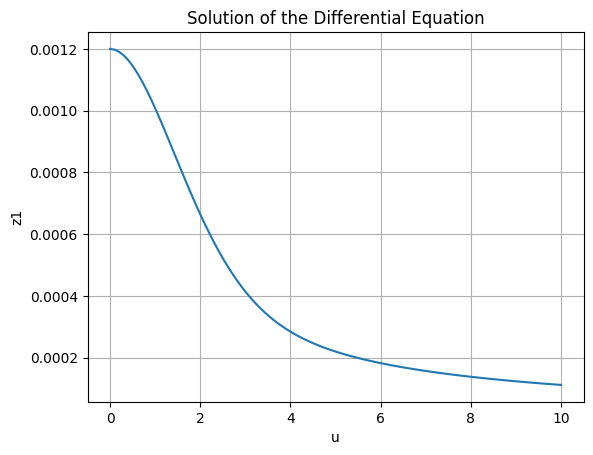

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE function
def model(z1, u):
    theta = 2.5
    z1_initial = 0.0012

    dz1_dt = (1/theta) * (z1_initial - z1) - (1/theta) * z1 * u
    return dz1_dt

# Set up time points for integration
u = np.linspace(0, 10, 100)  # Adjust the time range and number of points as needed

# Set initial condition
z1_initial = 0.0012

# Solve the ODE using odeint
z1_sol = odeint(model, z1_initial, u)

# Plot the solution
plt.plot(u, z1_sol)
plt.xlabel('u')
plt.ylabel('z1')
plt.title('Solution of the Differential Equation')
plt.grid()
plt.show()




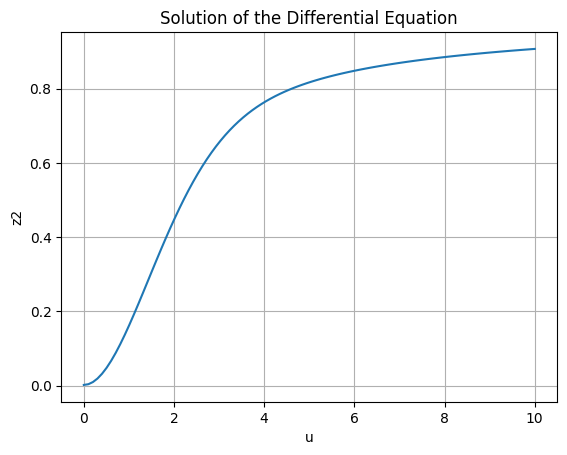

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE function
def model2(z2, u):
    theta = 2.5
    z2_initial = 1


    dz2_dt = (1/theta) * (z2_initial - z2) * u - (1/theta) * z2
    return dz2_dt

# Set up time points for integration
u = np.linspace(0, 10, 100)  # Adjust the time range and number of points as needed

# Set initial condition
z2_initial = 0.002

# Solve the ODE using odeint
z2_sol = odeint(model2, z2_initial, u)

# Plot the solution
plt.plot(u, z2_sol)
plt.xlabel('u')
plt.ylabel('z2')
plt.title('Solution of the Differential Equation')
plt.grid()
plt.show()



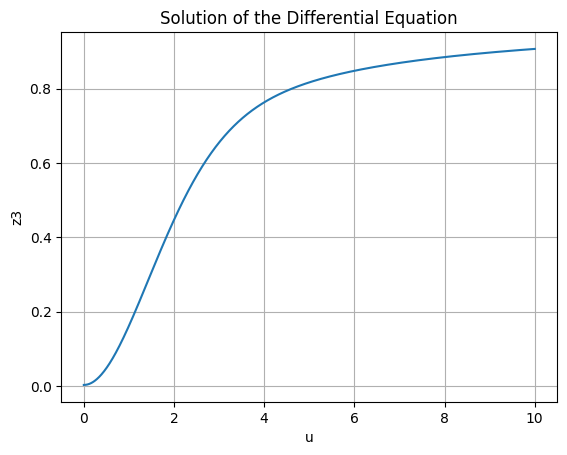

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE function
def model3(z3, u):
    theta = 2.5
    z3_initial = 1

    dz3_dt = (1/theta) * (z3_initial - z3) * u - (1/theta) * z3
    return dz3_dt

# Set up time points for integration
u = np.linspace(0, 10, 1000)  # Adjust the time range and number of points as needed

# Set initial condition
z3_initial = 0.0025

# Solve the ODE using odeint
z3_sol = odeint(model3, z3_initial, u)

# Plot the solution
plt.plot(u, z3_sol)
plt.xlabel('u')
plt.ylabel('z3')
plt.title('Solution of the Differential Equation')
plt.grid()
plt.show()


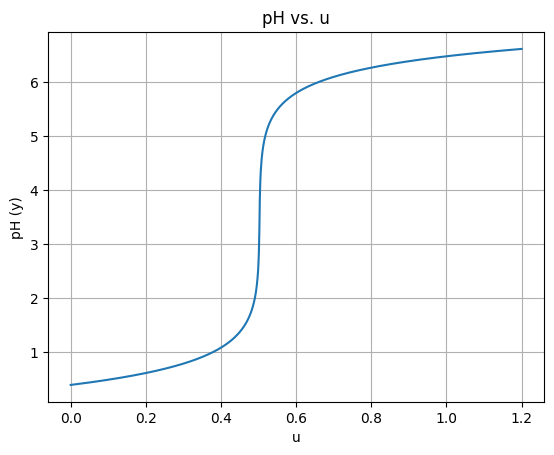

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect

# Define the equation h(z, y)
def h(y, z1, z2, z3 ,u):
    e = pow(10,-y)
    theta =2.5
    z1_initial = 1
    z2_initial = 1
    z3_initial = 1
    z1= (1/theta) * (z1_initial - z1) - (1/theta) * z1 * u
    z2= (1/theta) * (z2_initial - z2) * u - (1/theta) * z2
    z3= (1/theta) * (z3_initial - z3) * u - (1/theta) * z3

    return  e + z2 + z3 - z1 - (pow(10,-7) / e) - (z3 / (1 + (pow(10,7) * e)))

# Set up time points for integration
u_values = np.linspace(0, 1.2, 1000)  # Adjust the time range and number of points as needed

# Initial values of z1, z2, z3
z1_initial = 0.0012
z2 = 0.002 # Provide a value for z2
z3 = 0.0025 # Provide a value for z3

# Store the values of y that satisfy h(z, y) = 0 at different time points
y_values = [ ]

# Solve for y at each time point using the bisection method
for u in u_values:
    y_solution = bisect(h, -100, 100, args=(z1_initial, z2, z3, u))
    y_values.append(y_solution)

# Plot the graph of y vs. t
plt.plot(u_values, y_values)
plt.xlabel('u')
plt.ylabel('pH (y)')
plt.title('pH vs. u')
plt.grid()
plt.show()

